# Evaluation report for forecasting_dl

## 본 문서에서는 main.py을 이용한 학습/추론 결과에 대한 상세한 평가 결과를 확인할 수 있습니다.

### 지원 기능
#### - Input Asset
- Input data 간략히 살펴보기
#### - Readiness, Bizprerocess Asset
- dataset의 변수 구성 요약
- dataset의 그룹별 시계열 길이 시각화
- dataset의 시계열 그래프 시각화
- 이동 평균 선 비교 시각화
- Target에 대한 ACF Plot와 PACF Plot
- Target에 대한 시계열 분해 시각화
#### - Train Asset
- CV별 평가 점수 비교 시각화
- CV별 실제 값과 예측 값 비교 시각화
#### - Inference Asset
- 예측 결과 살펴보기
- 예측 결과 시각화


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from copy import copy
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
%%capture --no-display
from wrapping import Wrapper, EvaluationReport
wrapper = Wrapper();

# Train pipeline

In [3]:
%%capture --no-display
pipeline = 'train_pipeline'
wrapper.run_train_pipeline();

## input asset
----

In [4]:
%%capture --no-display
input_asset_structure = wrapper.get_input_asset(wrapper.init_asset_structure, pipeline);

### input data 간략히 살펴보기

In [7]:
input_asset_structure.data['dataframe'].head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## readiness asset
----

In [5]:
%%capture --no-display
readiness_asset_structure = wrapper.get_readiness_asset(input_asset_structure, pipeline);

### dataset의 변수 구성 요약

In [9]:
evaluationreport = EvaluationReport(asset_structure=readiness_asset_structure)
evaluationreport.summarize_variable_composition(evaluationreport.dataset, evaluationreport.config)

,Component,Count,List
0,Total columns,12,"[datetime, count, season, holiday, workingday,..."
1,Target column,1,[count]
2,Time column,1,[datetime]
3,X covaiates,10,"[season, holiday, workingday, weather, temp, a..."
4,Groupkey column,1,[None]
5,Static covariates,-,-


### dataset의 시계열 그래프 시각화

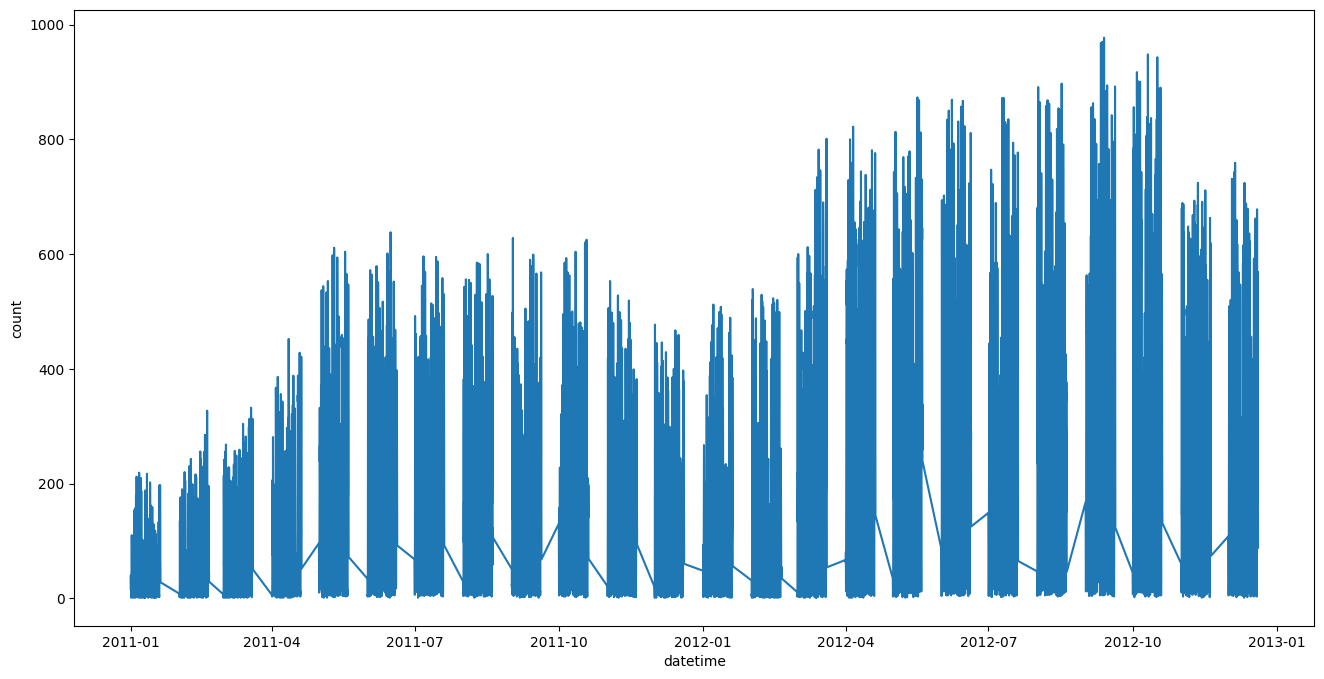

In [11]:
evaluationreport.timeseries_plot(evaluationreport.dataset, evaluationreport.config)

### 이동 평균 선 비교 시각화

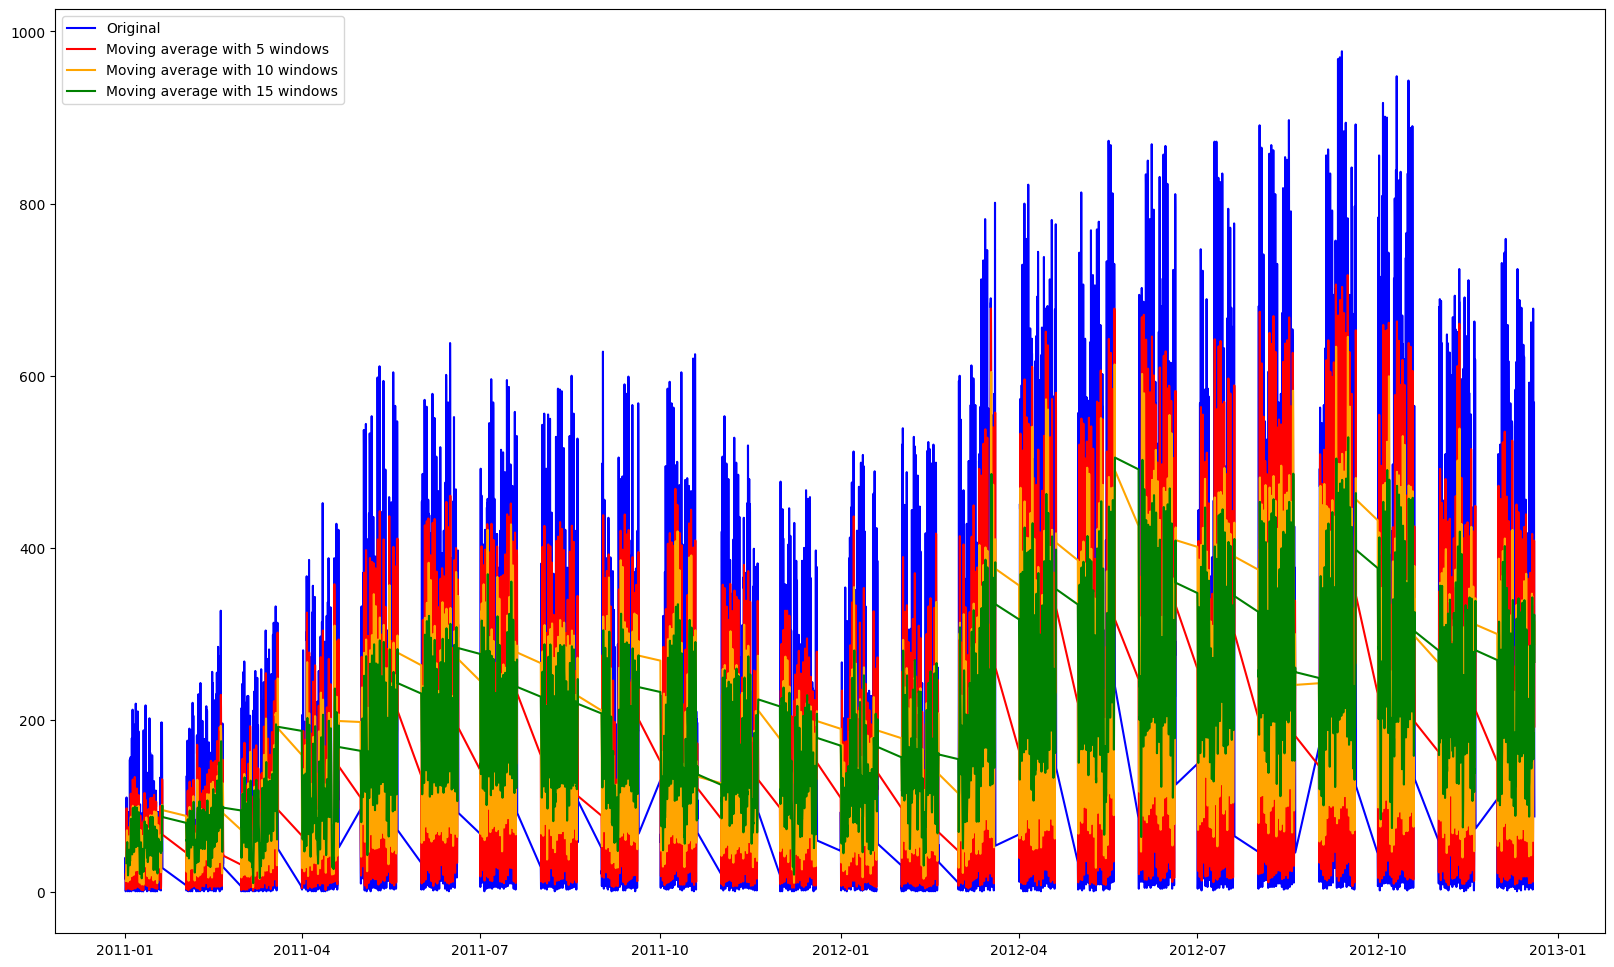

In [13]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     moving_windows=[5, 10, 15],
                                     show_each=True)

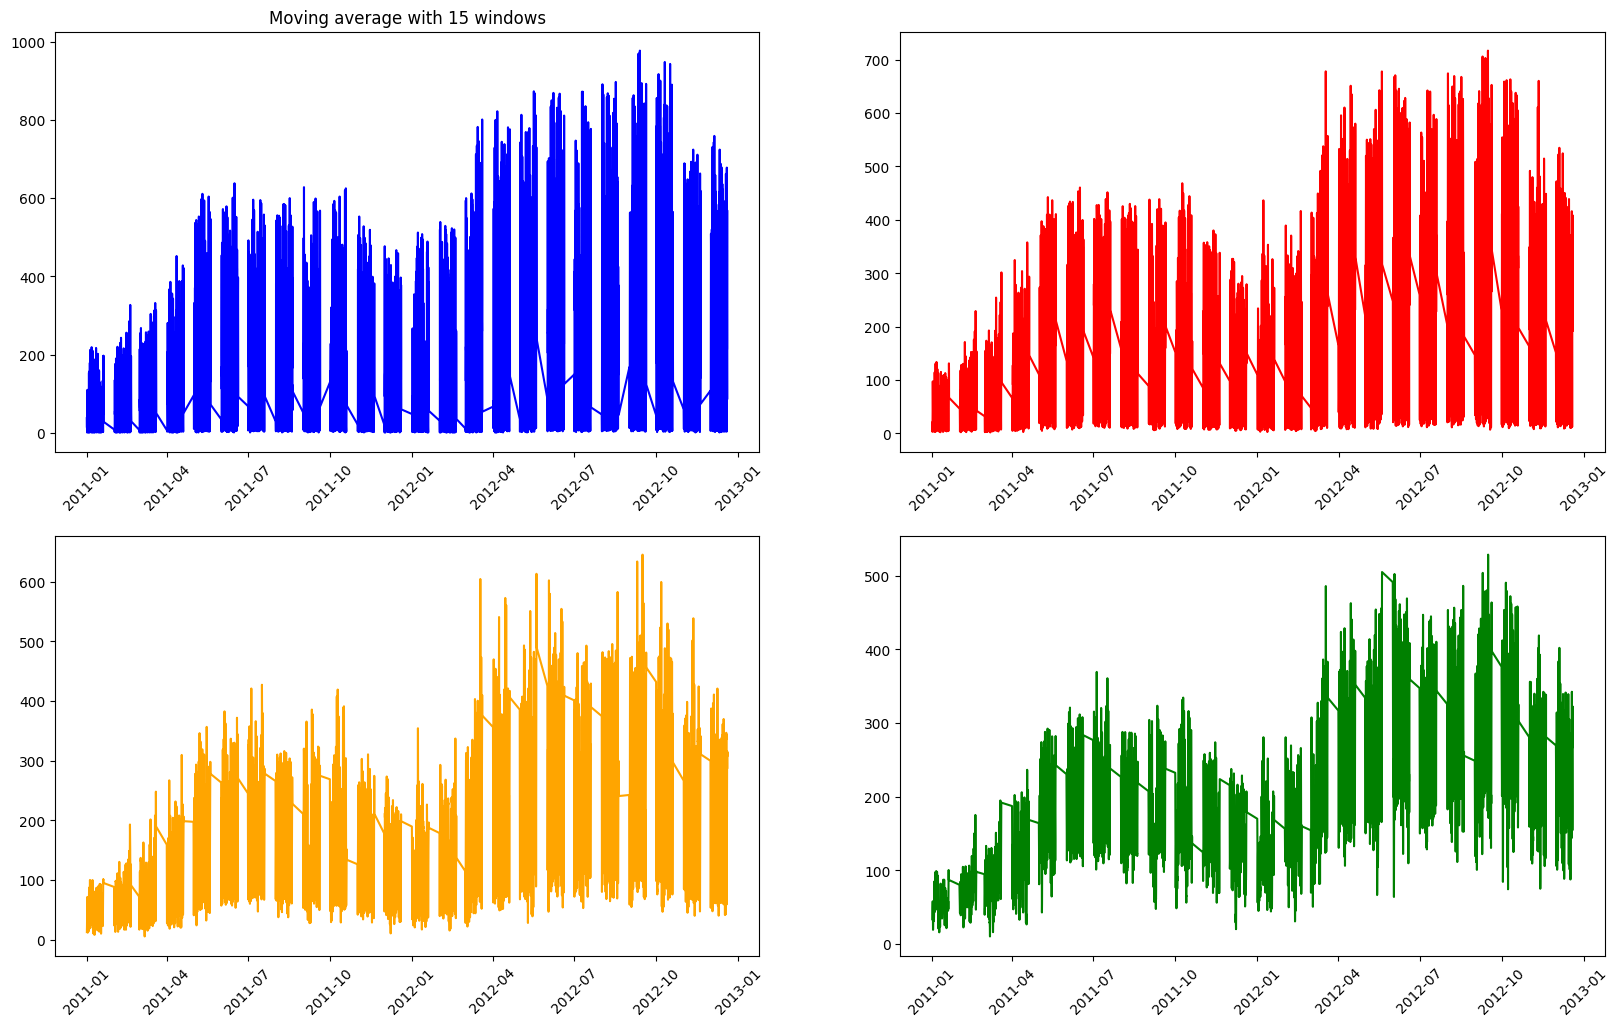

In [15]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     moving_windows=[5, 10, 15],
                                     show_each=False)

### Target에 대한 ACF Plot와 PACF Plot

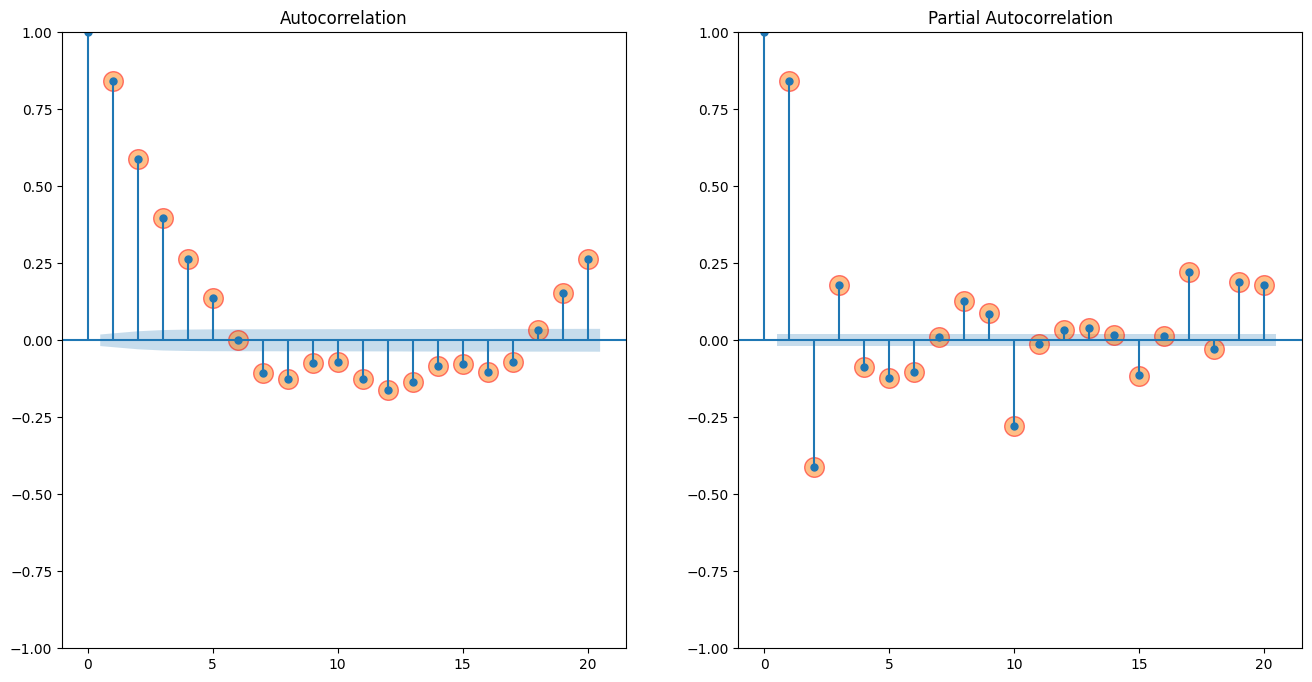

In [16]:
evaluationreport.timeseries_acf_pacf_plot(evaluationreport.dataset, evaluationreport.config)

### Target에 대한 시계열 분해 시각화

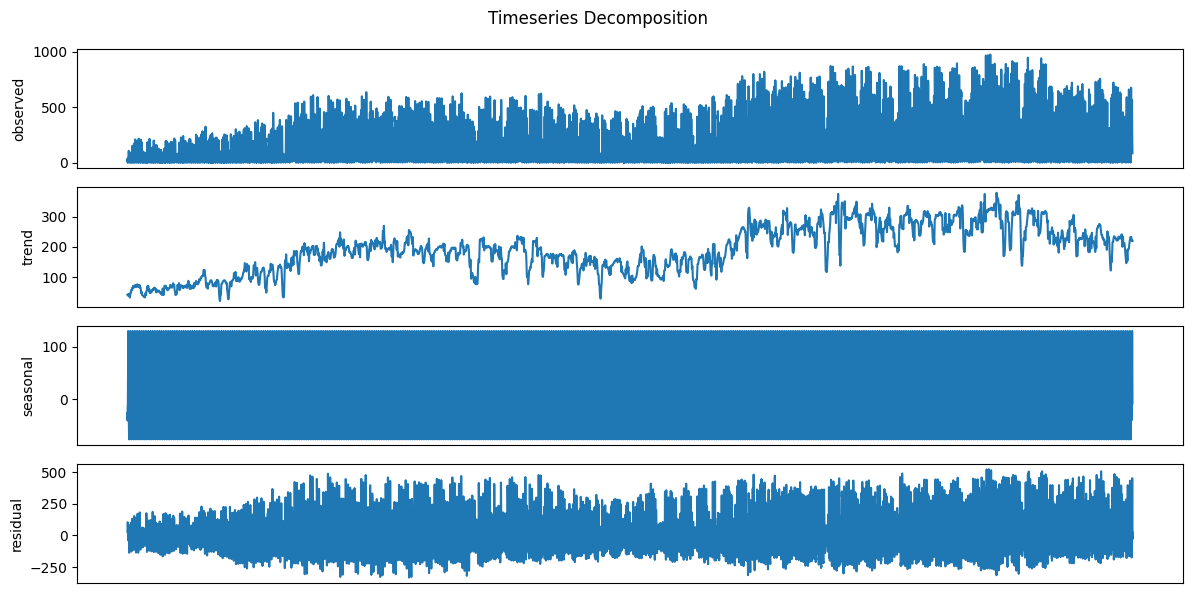

In [19]:
evaluationreport.timeseries_decomposition_plot(evaluationreport.dataset, evaluationreport.config, period=24)

## Bizpreprocess asset
----

In [6]:
%%capture --no-display
bizpreprocess_asset_structure = wrapper.get_bizpreprocess_asset(readiness_asset_structure, pipeline);

## Train asset
----

In [7]:
%%capture --no-display
cv_result_dict, cv_score_df = wrapper.get_train_asset_output();
train_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=train_asset_structure)

### CV별 평가 점수 비교 시각화

In [12]:
cv_score_df

,CV,Train Period,Valid Period,SMAPE
0,CV1,2011-01-01 00:00:00 ~ 2012-12-14 23:00:00,2012-12-15 00:00:00 ~ 2012-12-19 23:00:00,61.445527
1,CV2,2011-01-01 00:00:00 ~ 2012-12-09 23:00:00,2012-12-10 00:00:00 ~ 2012-12-14 23:00:00,39.628908
2,CV3,2011-01-01 00:00:00 ~ 2012-12-04 23:00:00,2012-12-05 00:00:00 ~ 2012-12-09 23:00:00,51.662010


Groupkey의 종류가 많은 경우에는 chart_type을 'box'로 변경해주세요.

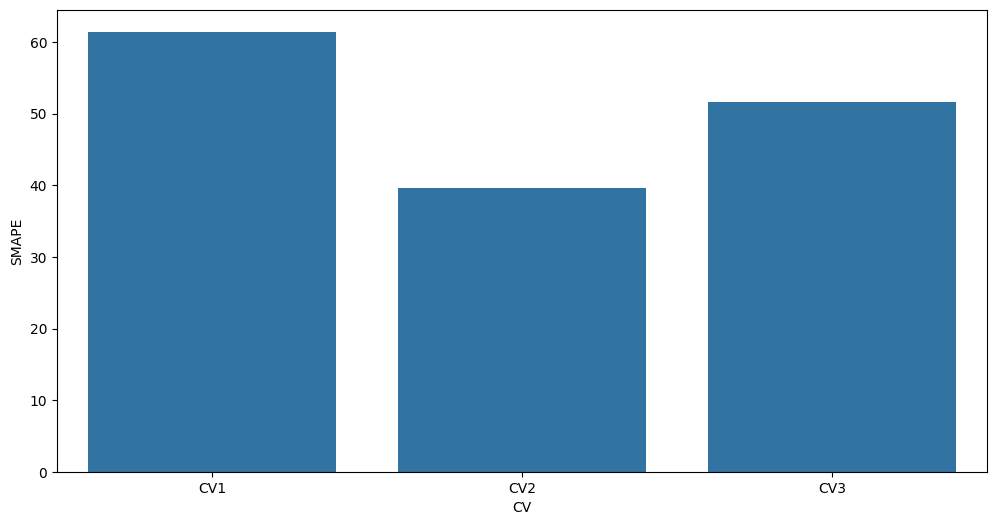

In [24]:
evaluationreport.train_cv_score_plot(evaluationreport.config,
                                     cv_score_df,
                                     chart_type='bar')

### CV별 실제 값과 예측 값 비교 시각화

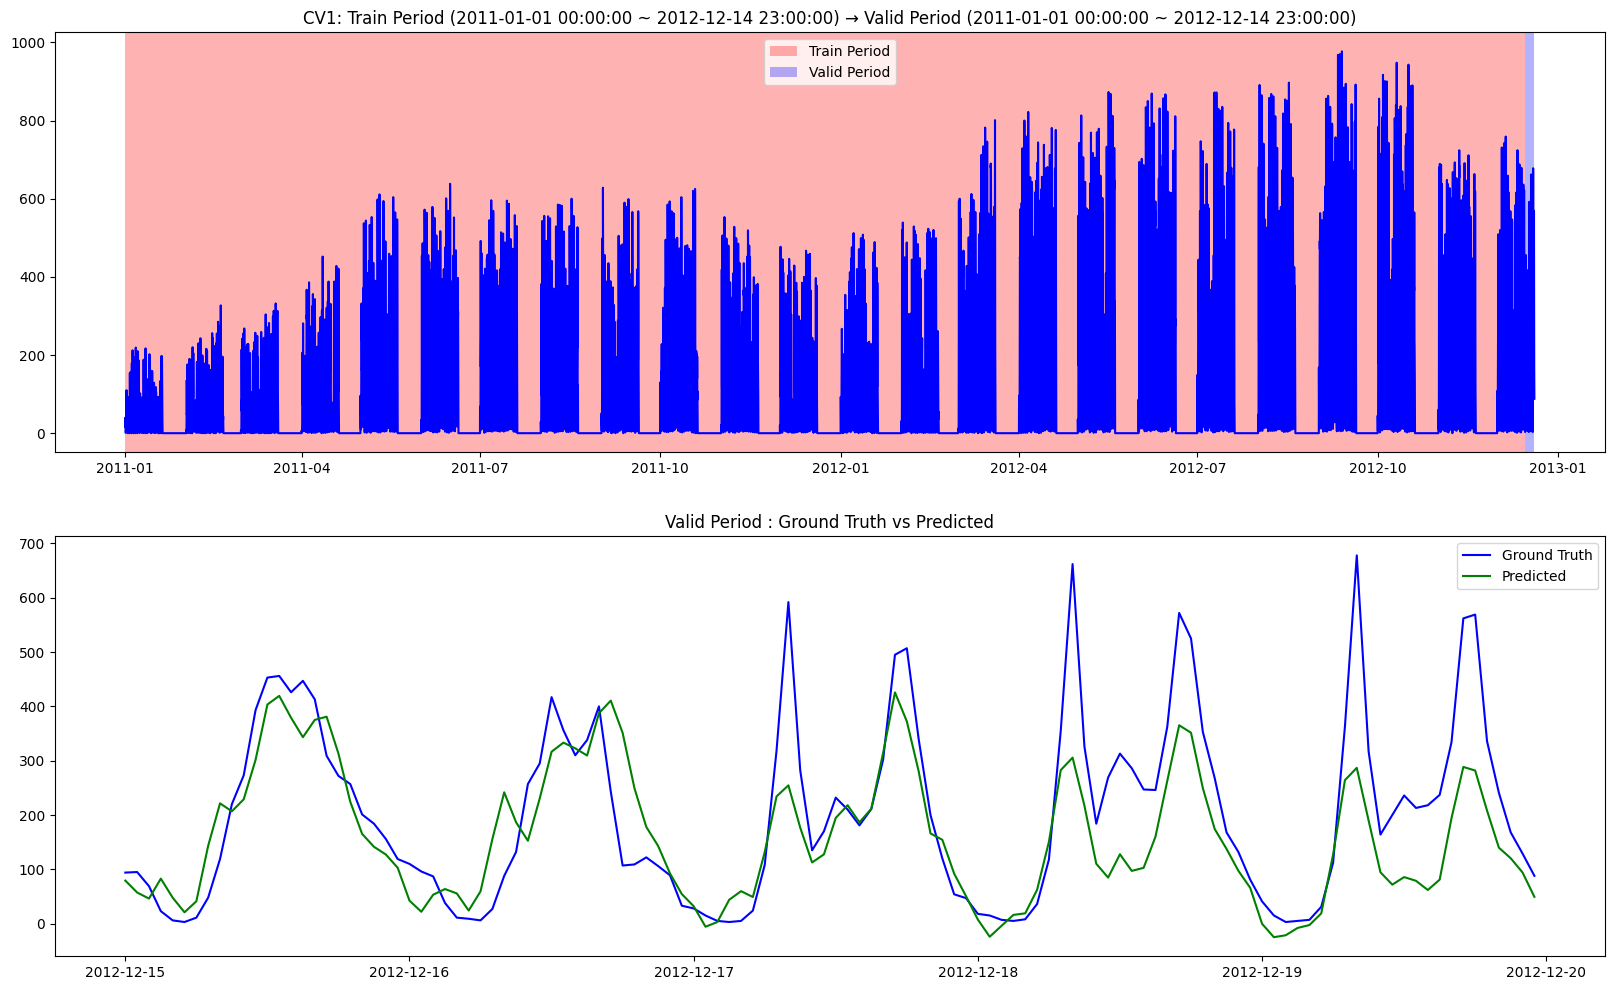

In [8]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV1')

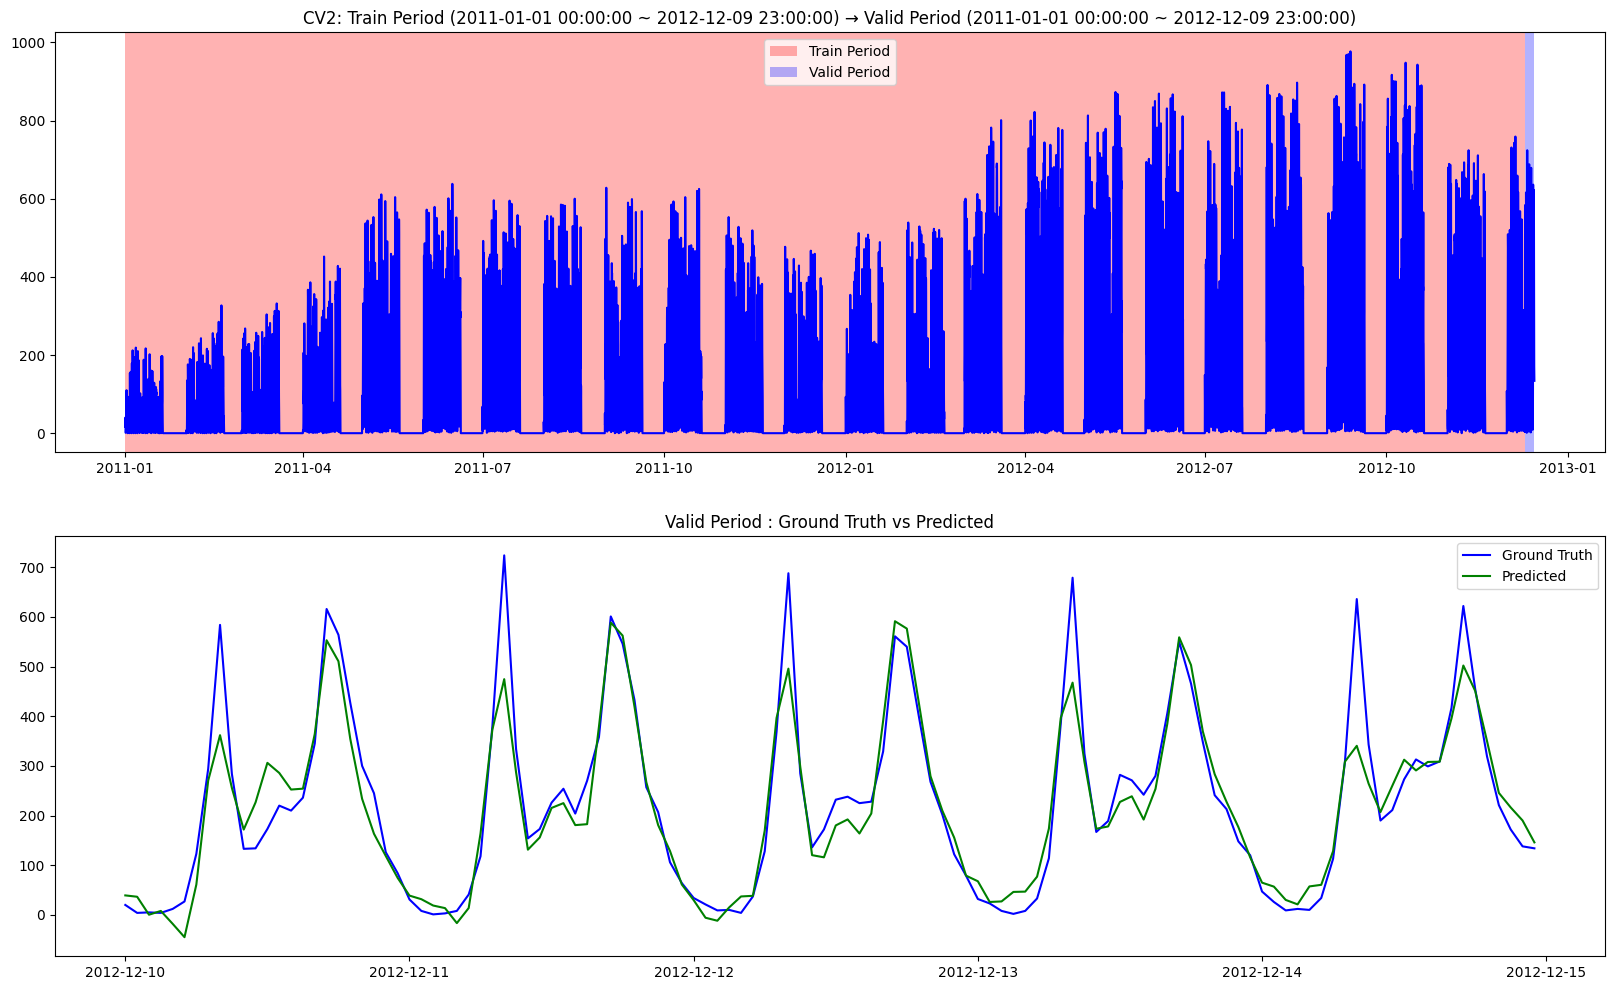

In [9]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV2')

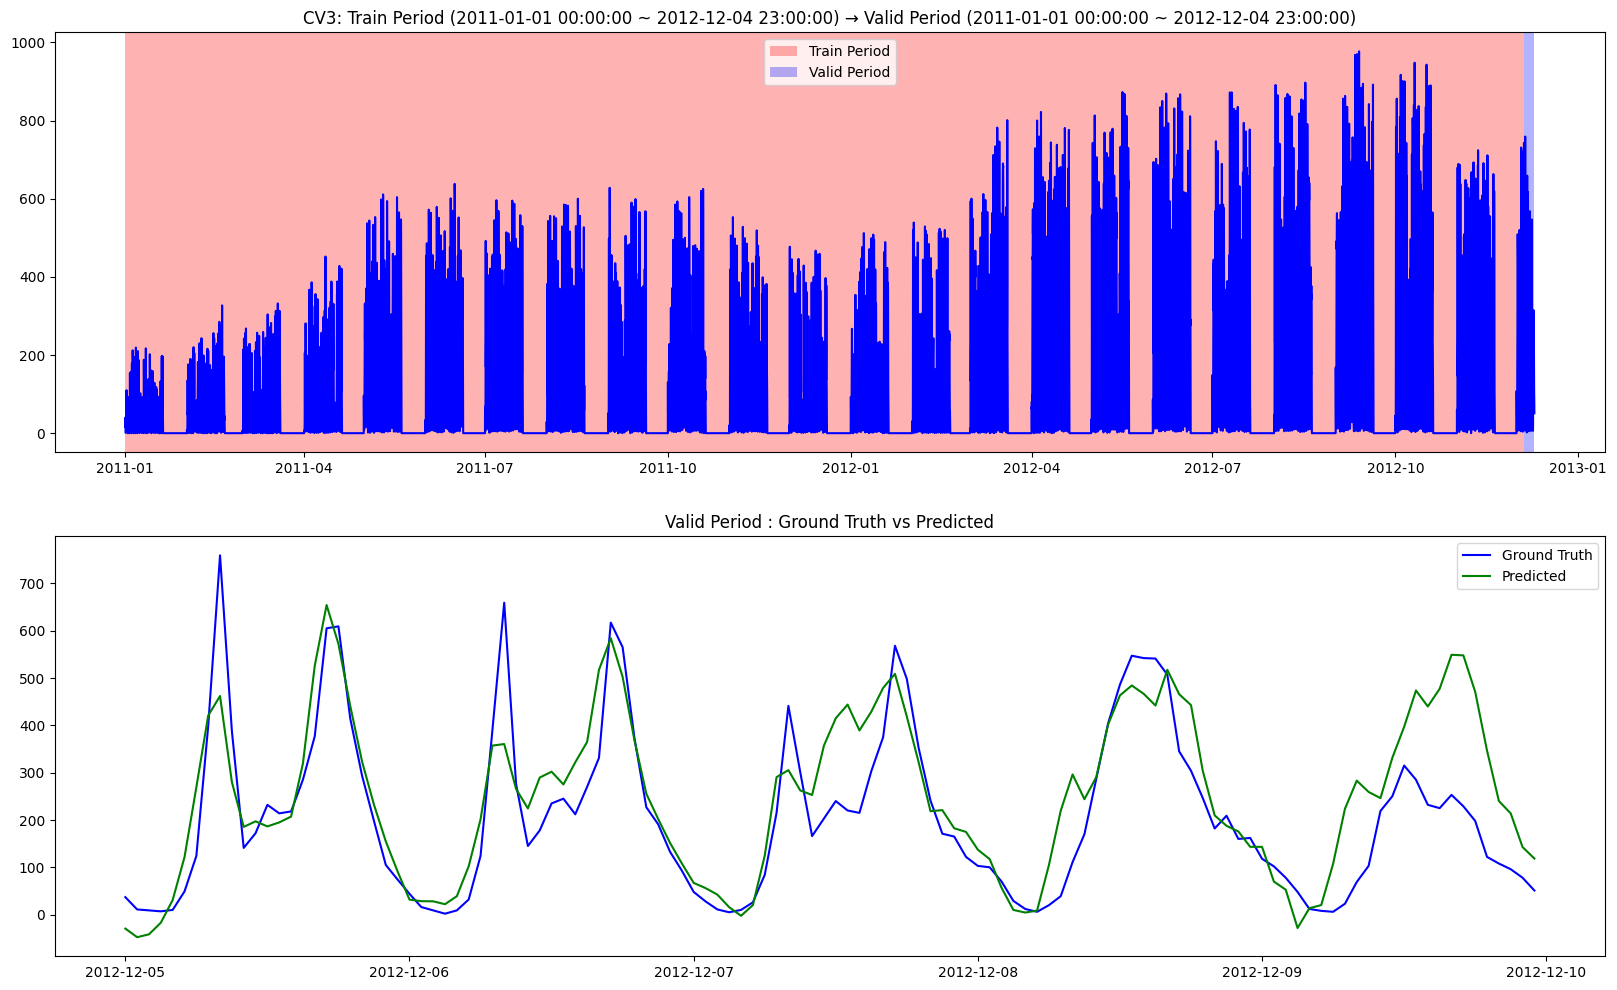

In [10]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV3')

# Inference pipeline


In [8]:
%%capture --no-display
pipeline = 'inference_pipeline'
wrapper.run_inference_pipeline();

## input asset
----

In [9]:
%%capture --no-display
input_asset_structure = wrapper.get_input_asset(wrapper.init_asset_structure, pipeline);

### input data 간략히 살펴보기

In [10]:
input_asset_structure.data['dataframe'].head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## readiness asset
----

In [29]:
%%capture --no-display
readiness_asset_structure = wrapper.get_readiness_asset(input_asset_structure, pipeline);

## Bizpreprocess asset
----

In [30]:
%%capture --no-display
bizpreprocess_asset_structure = wrapper.get_bizpreprocess_asset(readiness_asset_structure, pipeline);

## inference asset
----

In [31]:
%%capture --no-display
inference_prediction_df = wrapper.get_inference_asset_output();
inference_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=inference_asset_structure)

### 예측 결과 살펴보기

In [32]:
inference_prediction_df

,datetime,count
0,2012-12-20 00:00:00,32.505612
1,2012-12-20 01:00:00,2.379864
2,2012-12-20 02:00:00,0.917580
3,2012-12-20 03:00:00,14.017899
4,2012-12-20 04:00:00,32.329964
...,...,...
115,2012-12-24 19:00:00,148.242272
116,2012-12-24 20:00:00,91.293273
117,2012-12-24 21:00:00,71.132550
118,2012-12-24 22:00:00,57.005235


### 예측 결과 시각화

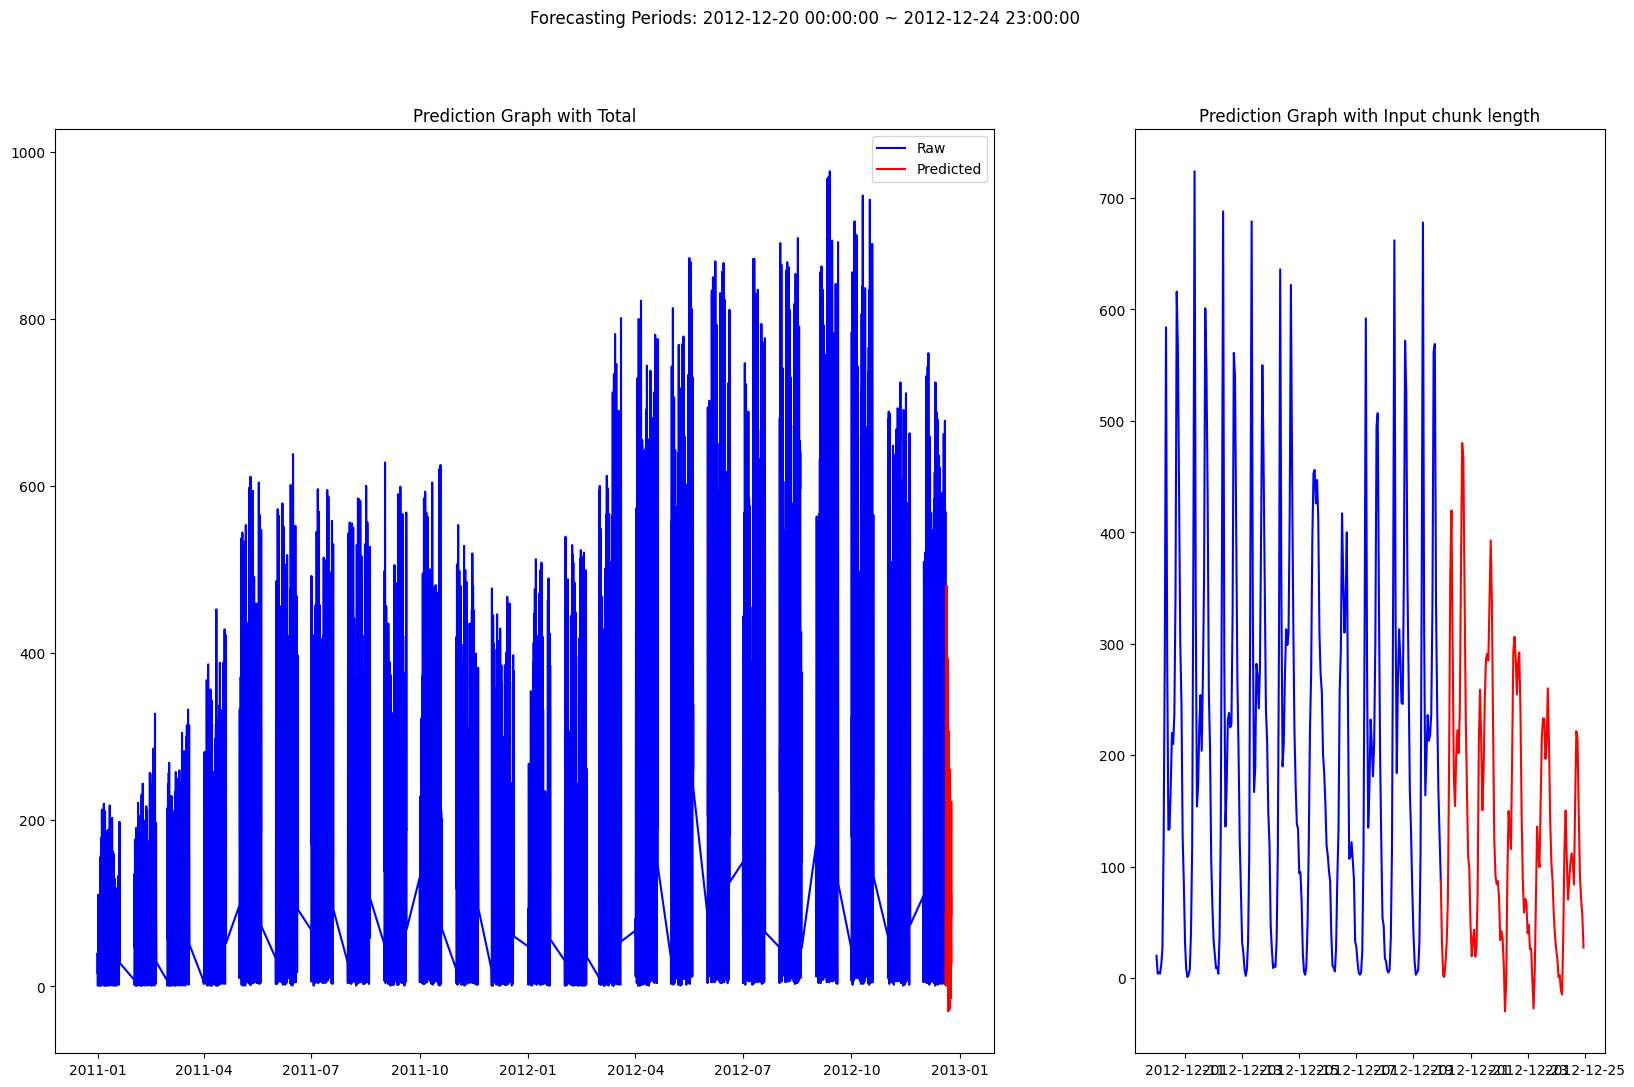

In [33]:
evaluationreport.inference_prediction_plot(evaluationreport.dataset,
                                           evaluationreport.config,
                                           inference_prediction_df)